# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
dataset = "https://raw.githubusercontent.com/miezlearning/Coding-Camp-2025/refs/heads/master/Belajar%20Machine%20Learning%20untuk%20Pemula/Dataset/hasil_clustering_mentahan.csv"

try:
  df = pd.read_csv(dataset)
  print("Data berhasil dibaca!")
  print("Jumlah baris dan kolom:", df.shape)
except FileNotFoundError:
  print(f"Error: Tidak ditemukan {dataset}. coba cek dataset.")
except pd.errors.ParserError:
    print(f"Error: Tidak bisa digunakan {dataset}. coba cek format filenya.")
except Exception as e:
    print(f"Error: {e}")

Data berhasil dibaca!
Jumlah baris dan kolom: (2464, 22)


## Membaca Data 👀

In [4]:
print("📊 Ringkasan Dataset:")
print(df.info(), "\n")
print(f"📌 Jumlah Baris: {df.shape[0]} | Jumlah Kolom: {df.shape[1]}\n")

print("🔍 Lima Baris Pertama dari Dataset:")
print(df.head(), "\n")

print("📊 Jumlah Nilai Unik per Kolom:")
print(df.nunique(), "\n")

missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("⚠️ Dataset memiliki nilai yang null!")
    print(missing_values[missing_values > 0], "\n")
else:
    print("✅ Tidak ada nilai yang null dalam dataset!\n")


📊 Ringkasan Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountID                 2464 non-null   object 
 1   TransactionAmount         2464 non-null   float64
 2   Location                  2464 non-null   object 
 3   DeviceID                  2464 non-null   object 
 4   IP Address                2464 non-null   object 
 5   MerchantID                2464 non-null   object 
 6   Channel                   2464 non-null   object 
 7   CustomerAge               2464 non-null   int64  
 8   CustomerOccupation        2464 non-null   object 
 9   TransactionDuration       2464 non-null   int64  
 10  LoginAttempts             2464 non-null   int64  
 11  AccountBalance            2464 non-null   float64
 12  PreviousTransactionDate   2464 non-null   object 
 13  TransactionDay            2464 non-null   

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:
X = df[['TransactionAmount_Scaled', 'TransactionDay_Scaled', 'Location_Encoded', 'Channel_Encoded', 'Merchant_Encoded']]
y = df['Cluster_KMeans_Opt']  # Label dari clustering optimal (2 kelas)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nJumlah data training: {X_train.shape[0]}, testing: {X_test.shape[0]}")

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Fitur terpilih: {selected_features}")


Jumlah data training: 1971, testing: 493
Fitur terpilih: ['TransactionAmount_Scaled', 'TransactionDay_Scaled', 'Location_Encoded', 'Channel_Encoded', 'Merchant_Encoded']


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### Dua algoritma klasifikasi digunakan:
1. Random Forest: Ensemble berbasis pohon keputusan yang kuat untuk data multikelas dan fitur campuran.
2. Support Vector Machine (SVM): Efektif untuk pemisahan kelas dengan kernel non-linear (RBF).

### Model Random Forest

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)
print("\n✅ Model Random Forest berhasil dilatih.")


✅ Model Random Forest berhasil dilatih.


### Model SVM

In [10]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_selected, y_train)

print("\n✅ Model  SVM berhasil dilatih.")



✅ Model  SVM berhasil dilatih.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.



---


Random Forest dipilih karena kemampuannya menangani fitur numerikal dan kategorikal dengan baik serta ketahanannya terhadap overfitting. SVM dengan kernel RBF dipilih untuk menangani batas keputusan non-linear pada data yang telah distandarisasi, cocok untuk klasifikasi biner dari 2 cluster.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


🔵 Evaluasi Random Forest:
Akurasi: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       244

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493



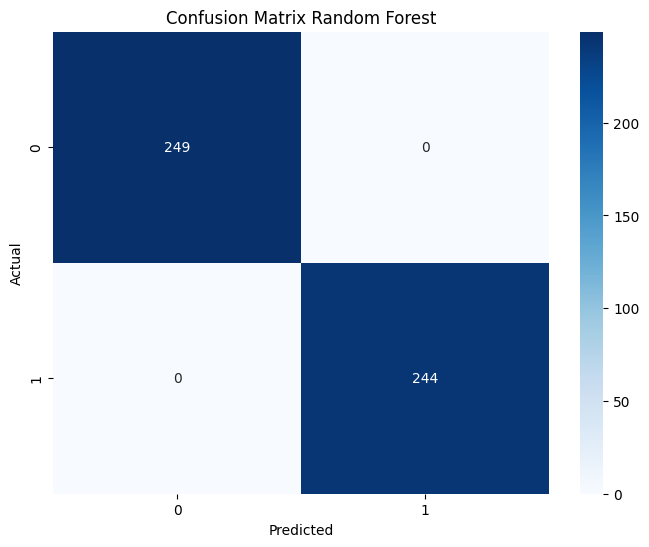


🟢 Evaluasi SVM:
Akurasi: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       244

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493



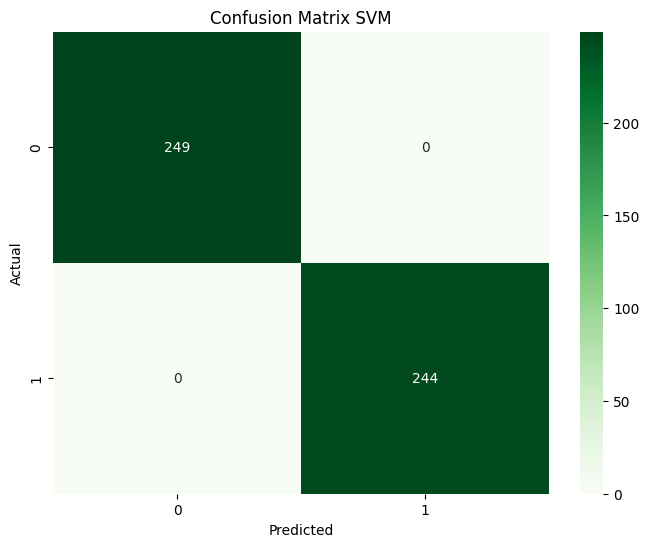

In [11]:
# Evaluasi Random Forest
y_pred_rf = rf.predict(X_test_selected)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("\n🔵 Evaluasi Random Forest:")
print(f"Akurasi: {acc_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluasi SVM
y_pred_svm = svm.predict(X_test_selected)
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("\n🟢 Evaluasi SVM:")
print(f"Akurasi: {acc_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [15]:
print("\nPerbandingan Hasil Evaluasi:")
print(f"Random Forest - Akurasi: {acc_rf:.4f}, F1-Score: {f1_rf:.4f}")
print(f"SVM - Akurasi: {acc_svm:.4f}, F1-Score: {f1_svm:.4f}")
if acc_rf > acc_svm:
    print("Random Forest lebih unggul berdasarkan akurasi dan F1-Score.")
else:
    print("SVM lebih unggul berdasarkan akurasi dan F1-Score.")


Perbandingan Hasil Evaluasi:
Random Forest - Akurasi: 1.0000, F1-Score: 1.0000
SVM - Akurasi: 1.0000, F1-Score: 1.0000
SVM lebih unggul berdasarkan akurasi dan F1-Score.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik
---
Menggunakan GridSearchCV pada Random Forest untuk mencapai akurasi dan F1-Score ≥ 92%.

In [16]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_rf.fit(X_train_selected, y_train)
print("\n🔵 Tuning Random Forest:")
print(f"Parameter terbaik: {grid_rf.best_params_}")


🔵 Tuning Random Forest:
Parameter terbaik: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Akurasi Random Forest (setelah tuning): 1.0000
F1-Score Random Forest (setelah tuning): 1.0000
Classification Report setelah Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       244

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493



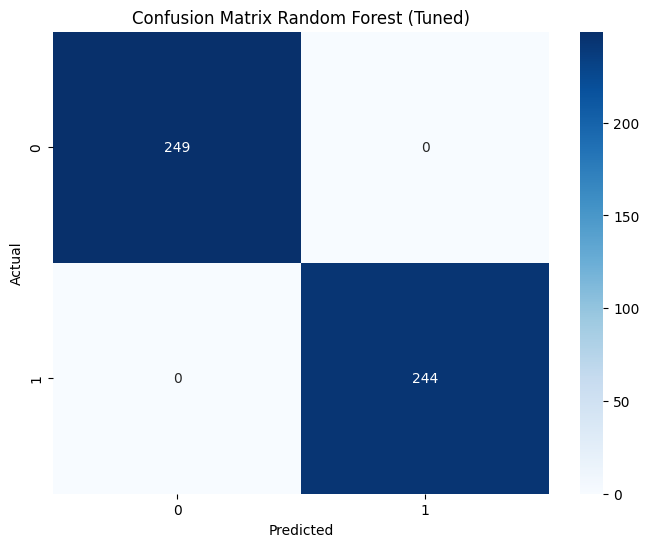

In [17]:
# Evaluasi Random Forest setelah Tuning
y_pred_rf_opt = grid_rf.predict(X_test_selected)
acc_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
f1_rf_opt = f1_score(y_test, y_pred_rf_opt, average='weighted')
print(f"Akurasi Random Forest (setelah tuning): {acc_rf_opt:.4f}")
print(f"F1-Score Random Forest (setelah tuning): {f1_rf_opt:.4f}")
print("Classification Report setelah Tuning:")
print(classification_report(y_test, y_pred_rf_opt))

# Confusion Matrix setelah Tuning
cm_rf_opt = confusion_matrix(y_test, y_pred_rf_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_opt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [18]:
print("\nAnalisis Hasil Evaluasi Model Klasifikasi:")
print(f"Sebelum Tuning - Random Forest: Akurasi {acc_rf:.4f}, F1-Score {f1_rf:.4f}")
print(f"Setelah Tuning - Random Forest: Akurasi {acc_rf_opt:.4f}, F1-Score {f1_rf_opt:.4f}")
print(f"SVM: Akurasi {acc_svm:.4f}, F1-Score {f1_svm:.4f}")

# Perbandingan
if acc_rf_opt > acc_rf:
    print("Tuning meningkatkan performa Random Forest.")
else:
    print("Tuning tidak memberikan peningkatan signifikan pada Random Forest.")

# Identifikasi Kelemahan
print("\nKelemahan Model:")
if f1_rf_opt < 0.92 or acc_rf_opt < 0.92:
    print("- Akurasi atau F1-Score belum mencapai target 92%. Mungkin ada ketidakseimbangan kelas atau fitur kurang representatif.")
    print("- Kemungkinan overfitting jika performa pada training jauh lebih baik daripada testing.")
else:
    print("- Tidak ada kelemahan signifikan. Model telah mencapai target performa.")

# Rekomendasi
print("\nRekomendasi Tindakan Lanjutan:")
if f1_rf_opt < 0.92 or acc_rf_opt < 0.92:
    print("- Tambah fitur baru (misalnya CustomerAge, TransactionDuration) untuk meningkatkan variasi.")
    print("- Coba algoritma lain seperti XGBoost atau tingkatkan preprocessing (contoh: PCA).")
else:
    print("- Model siap digunakan untuk memprediksi cluster transaksi.")


Analisis Hasil Evaluasi Model Klasifikasi:
Sebelum Tuning - Random Forest: Akurasi 1.0000, F1-Score 1.0000
Setelah Tuning - Random Forest: Akurasi 1.0000, F1-Score 1.0000
SVM: Akurasi 1.0000, F1-Score 1.0000
Tuning tidak memberikan peningkatan signifikan pada Random Forest.

Kelemahan Model:
- Tidak ada kelemahan signifikan. Model telah mencapai target performa.

Rekomendasi Tindakan Lanjutan:
- Model siap digunakan untuk memprediksi cluster transaksi.
